In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [5]:
url='https://raw.githubusercontent.com/4GeeksAcademy/random-forest-project-tutorial/main/titanic_train.csv'
df = pd.read_csv(url, index_col=[0,3])

In [6]:
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, squeeze: 'bool | None' = None, prefix: 'str | lib.NoDefault' = <no_default>, mangle_dupe_cols: 'bool' = True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates=None, infer_datetime_format: 'bool' = False, keep_date_col: 'bool' = False, date_parser=None, dayfirs

In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include='object')

,Sex,Ticket,Cabin,Embarked
count,891,891,204,889
unique,2,681,147,3
top,male,347082,B96 B98,S
freq,577,7,4,644


In [7]:
df.sample(10)

,,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,Name,,,,,,,,,,
837,"Pasic, Mr. Jakob",0,3,male,21.0,0,0,315097,8.6625,NaN,S
84,"Carrau, Mr. Francisco M",0,1,male,28.0,0,0,113059,47.1000,NaN,S
690,"Madill, Miss. Georgette Alexandra",1,1,female,15.0,0,1,24160,211.3375,B5,S
116,"Pekoniemi, Mr. Edvard",0,3,male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S
563,"Norman, Mr. Robert Douglas",0,2,male,28.0,0,0,218629,13.5000,NaN,S
292,"Bishop, Mrs. Dickinson H (Helen Walton)",1,1,female,19.0,1,0,11967,91.0792,B49,C
776,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",0,3,male,18.0,0,0,347078,7.7500,NaN,S
402,"Adams, Mr. John",0,3,male,26.0,0,0,341826,8.0500,NaN,S
246,"Minahan, Dr. William Edward",0,1,male,44.0,2,0,19928,90.0000,C78,Q


In [8]:
df=df.drop(columns='Cabin')

In [9]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 891 entries, (1, 'Braund, Mr. Owen Harris') to (891, 'Dooley, Mr. Patrick')
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 144.7+ KB


In [11]:
df[['Sex','Embarked','Survived']]=df[['Sex','Embarked','Survived']].astype('category')

In [7]:
y=df['Survived']
X=df.drop(columns=['Ticket','Survived']).copy()

In [8]:

df.describe(include='object')

,Sex,Ticket,Cabin,Embarked
count,891,891,204,889
unique,2,681,147,3
top,male,347082,B96 B98,S
freq,577,7,4,644


In [9]:
df.sample(10)

,,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,Name,,,,,,,,,,
252,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",0,3,female,29.0,1,1,347054,10.4625,G6,S
331,"McCoy, Miss. Agnes",1,3,female,NaN,2,0,367226,23.2500,NaN,Q
472,"Cacic, Mr. Luka",0,3,male,38.0,0,0,315089,8.6625,NaN,S
196,"Lurette, Miss. Elise",1,1,female,58.0,0,0,PC 17569,146.5208,B80,C
99,"Doling, Mrs. John T (Ada Julia Bone)",1,2,female,34.0,0,1,231919,23.0000,NaN,S
530,"Hocking, Mr. Richard George",0,2,male,23.0,2,1,29104,11.5000,NaN,S
377,"Landergren, Miss. Aurora Adelia",1,3,female,22.0,0,0,C 7077,7.2500,NaN,S
70,"Kink, Mr. Vincenz",0,3,male,26.0,2,0,315151,8.6625,NaN,S
730,"Ilmakangas, Miss. Pieta Sofia",0,3,female,25.0,1,0,STON/O2. 3101271,7.9250,NaN,S


In [10]:
df=df.drop(columns='Cabin')

In [11]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 891 entries, (1, 'Braund, Mr. Owen Harris') to (891, 'Dooley, Mr. Patrick')
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 144.7+ KB


In [13]:
df[['Sex','Embarked','Survived']]=df[['Sex','Embarked','Survived']].astype('category')

In [14]:
y=df['Survived']
X=df.drop(columns=['Ticket','Survived']).copy()

In [15]:
X['Sex']=X['Sex'].cat.codes

In [16]:
X['Embarked']=X['Embarked'].cat.codes

In [17]:
X.head()

,,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,Name,,,,,,,
1,"Braund, Mr. Owen Harris",3,1,22.0,1,0,7.2500,2
2,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,0,38.0,1,0,71.2833,0
3,"Heikkinen, Miss. Laina",3,0,26.0,0,0,7.9250,2
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1,0,53.1000,2
5,"Allen, Mr. William Henry",3,1,35.0,0,0,8.0500,2


In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1107)

In [19]:
y.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [20]:
classif=RandomForestClassifier(random_state=1107)

In [21]:
classif.fit(X_train,y_train)

RandomForestClassifier(random_state=1107)

In [22]:
y_pred=classif.predict(X_test)

In [23]:
print('Classification report- First Model')
print(classification_report(y_test,y_pred))

Classification report- First Model
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       141
           1       0.81      0.71      0.75        82

    accuracy                           0.83       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.83      0.83      0.83       223



In [24]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#Criterion for measure the quality of a split
criterion=['gini','entropy']
# class weight for unbalanced samples
weight=['balanced', None]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
#'max_features': max_features, # Son muy pocas variables por lo cual no vale la pena aplicarlo
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap,
'criterion':criterion,
'class_weight':weight}
print(random_grid)

{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'class_weight': ['balanced', None]}


In [25]:
classif_grid=RandomForestClassifier(random_state=1107)
classif_grid_random=RandomizedSearchCV(estimator=classif_grid,n_iter=100,cv=5,random_state=1107,param_distributions=random_grid)

In [27]:
classif_grid_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1107),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced', None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 35, 60, 85, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 650, 1100, 1550,
                                                         2000]},
                   random_state=1107)

In [28]:
print('The best model has the parameters:',classif_grid_random.best_params_)

The best model has the parameters: {'n_estimators': 1550, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}


In [29]:
best_clas=RandomForestClassifier(n_estimators= 1550,min_samples_split= 2,min_samples_leaf= 2,max_depth= 10,criterion= 'gini',
 bootstrap= True,class_weight=None)

In [30]:
best_clas.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=1550)

In [31]:
y_pred_best=best_clas.predict(X_test)

In [32]:
print('Classification report- Best Model')
print(classification_report(y_test,y_pred_best))

Classification report- Best Model
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       141
           1       0.85      0.71      0.77        82

    accuracy                           0.85       223
   macro avg       0.85      0.82      0.83       223
weighted avg       0.85      0.85      0.84       223



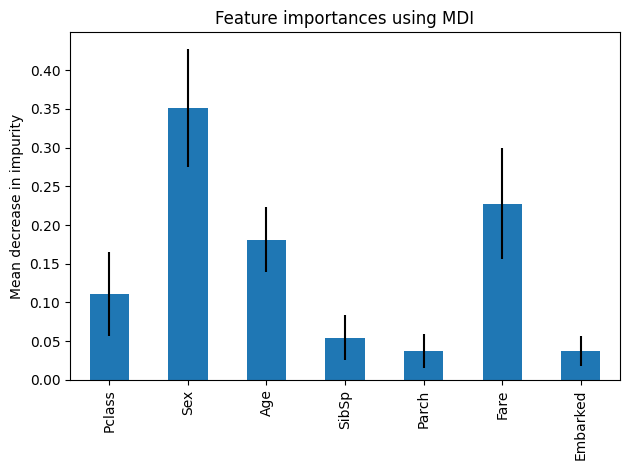

In [33]:
importances = best_clas.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_clas.estimators_], axis=0)
#feature_names = [f"feature {i}" for i in range(X.shape[1])]
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [35]:
import pickle
filename = '/workspace/Random-Forest/models/finalized_model.sav'
pickle.dump(best_clas, open(filename, 'wb'))

In [36]:
# Se transforman las dos muestras a fromato DMatrix
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [37]:
param = {
    'objective': 'binary:hinge'}
steps=20
clf_xgb = xgb.train(param, D_train, steps)
preds_xgb = clf_xgb.predict(D_test)

In [38]:
print('Classification report- XGBoost')
print(classification_report(y_test,preds_xgb))

Classification report- XGBoost
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       141
           1       0.79      0.71      0.75        82

    accuracy                           0.83       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.83      0.82       223



In [ ]:
xgb.plot_importance(clf_xgb)

In [39]:
clf = xgb.XGBClassifier()

parameters = {
     "eta"    : [0.05, 0.15, 0.30 ] ,
     "max_depth"        : [ 3, 6, 15],
     "min_child_weight" : [ 1, 7],
     "gamma"            : [ 0.0, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

In [40]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'eta': [0.05, 0.15, 0.3], 'gamma': [0.0, 0.4],
                         'max_depth': [3, 6, 15], 'min_child_weight': [1, 7]},
             scoring='neg_log_loss')

In [41]:
grid.best_params_['objective']= 'binary:hinge'

In [42]:
print('The best model has the parameters:',grid.best_params_)

The best model has the parameters: {'colsample_bytree': 0.7, 'eta': 0.05, 'gamma': 0.4, 'max_depth': 3, 'min_child_weight': 1, 'objective': 'binary:hinge'}


In [43]:
best_clf_xgb=xgb.XGBClassifier(**grid.best_params_)
best_clf_xgb.fit(X_train,y_train)
best_xgb_pred=best_clf_xgb.predict(X_test)

In [44]:
print('Classification report- Best XGBoost')
print(classification_report(y_test,best_xgb_pred))

Classification report- Best XGBoost
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       141
           1       0.76      0.73      0.75        82

    accuracy                           0.82       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.82      0.82       223



In [ ]:

filename = '/workspace/Random-Forest/models/finalized_model_XGB.sav'
pickle.dump(best_clas, open(filename, 'wb'))